In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("customer_churn_data.csv")
df = df.dropna()

In [ ]:
df = df.drop(["customer_id"], axis=1)

In [ ]:
# Encode categorical variables and drop NULL values
df = pd.get_dummies(df, drop_first=True, dtype='int')
df.head()

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls,gender_Male,partner_Yes,dependents_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,churn_Yes
0,52,0,7,39.18,294.66,4,3,1,1,1,...,1,0,0,1,0,1,0,1,0,0
1,42,0,32,40.36,1286.75,3,1,1,1,0,...,0,1,0,1,0,1,0,1,0,0
2,54,0,12,84.77,947.09,2,3,1,0,1,...,1,0,1,0,0,0,0,0,0,1
3,67,1,3,54.14,172.76,4,5,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,41,0,7,71.77,466.98,3,3,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# Seperate features & Class Label
X = df.iloc[:, :-1]
Y = df["churn_Yes"]

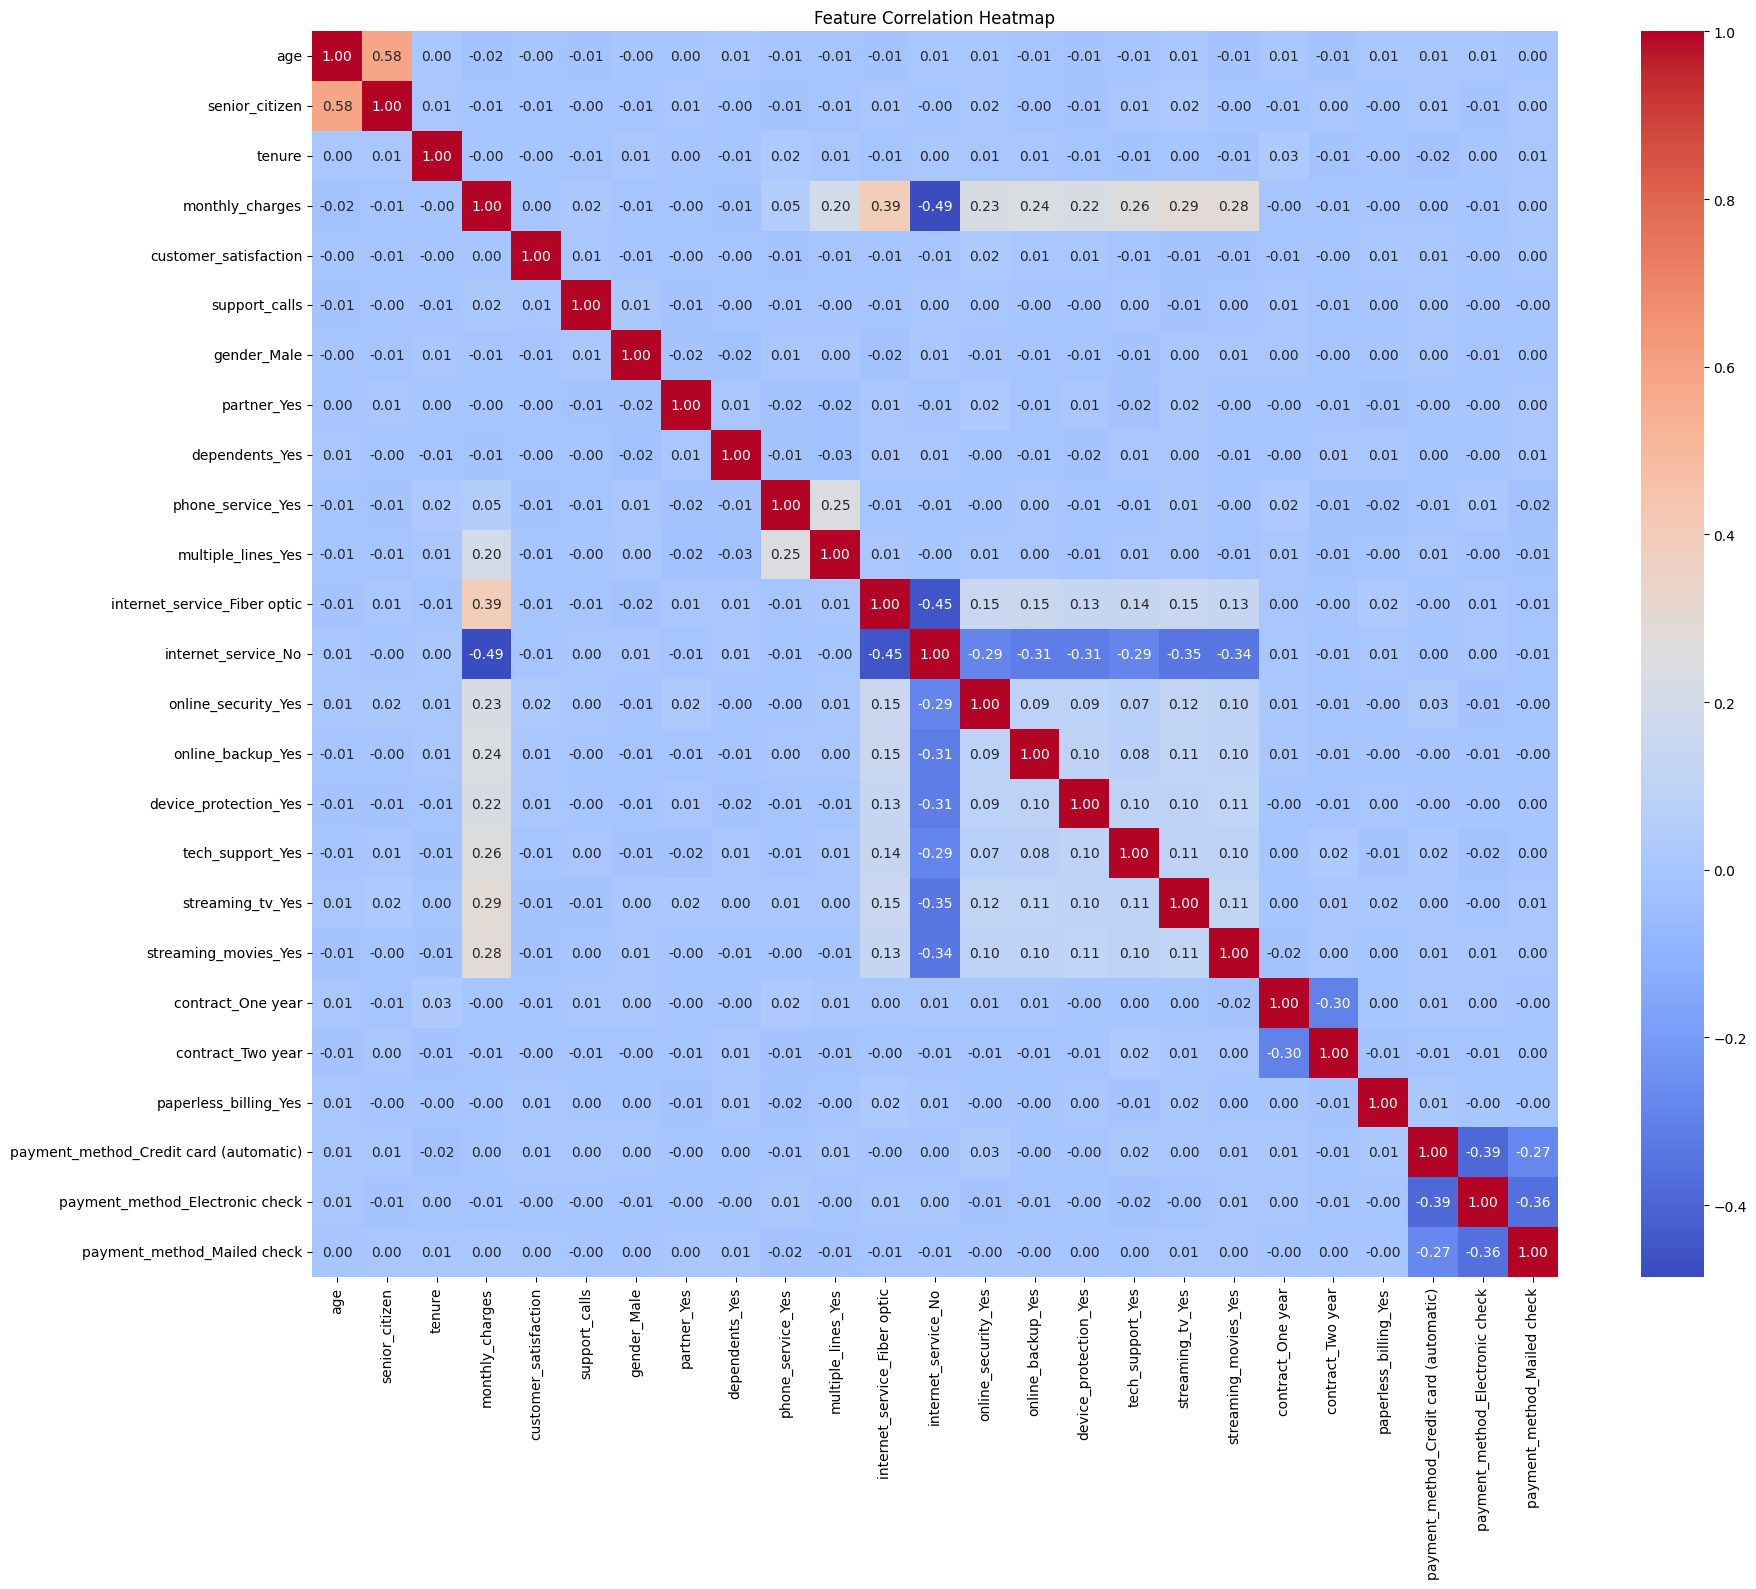

In [ ]:
corr_matrix = X.corr()

# Drop all features with high +ve / -ve correlation to other variables
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8) or any(upper_tri[column] < -0.8)]
X = X.drop(to_drop, axis=1)

# Check correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

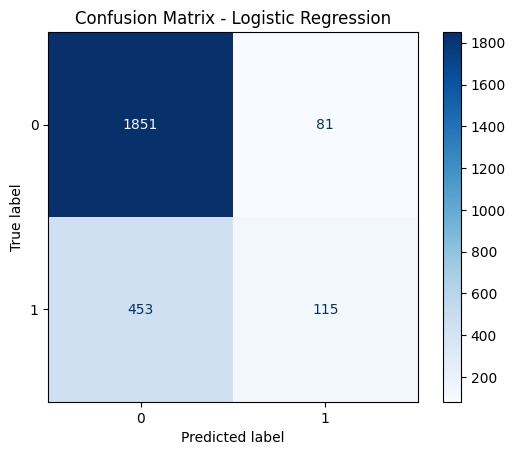

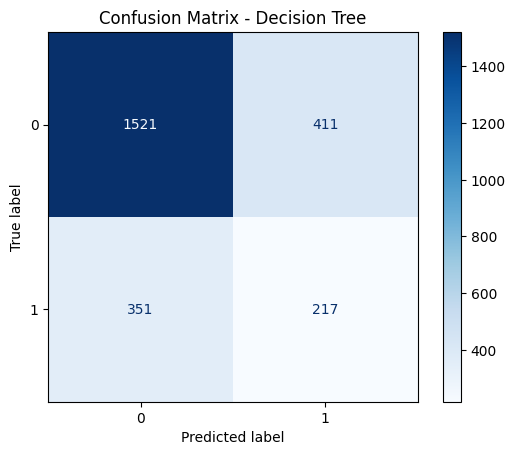

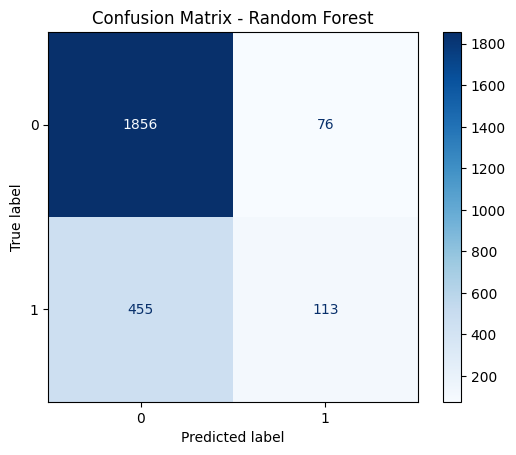

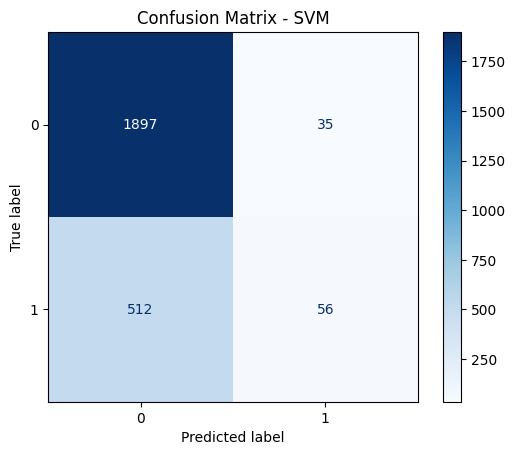

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression    0.7864   0.586735  0.202465  0.301047
1        Decision Tree    0.6952   0.345541  0.382042  0.362876
2        Random Forest    0.7876   0.597884  0.198944  0.298547
3                  SVM    0.7812   0.615385  0.098592  0.169954


In [ ]:
# Model training and metrics
models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0, n_estimators=100),
    "SVM": SVC(random_state=0)
}

results = []
for name, model in models.items():
      model.fit(X_train, Y_train)
      preds = model.predict(X_test)

      results.append({
        "Model": name,
        "Accuracy": accuracy_score(Y_test, preds),
        "Precision": precision_score(Y_test, preds, zero_division=0),
        "Recall": recall_score(Y_test, preds, zero_division=0),
        "F1-score": f1_score(Y_test, preds, zero_division=0)
      })

      cm = confusion_matrix(Y_test, preds)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot(cmap="Blues")
      plt.title(f"Confusion Matrix - {name}")
      plt.show()

In [ ]:
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression    0.7864   0.586735  0.202465  0.301047
1        Decision Tree    0.6952   0.345541  0.382042  0.362876
2        Random Forest    0.7876   0.597884  0.198944  0.298547
3                  SVM    0.7812   0.615385  0.098592  0.169954
